In [1]:
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import os
os.getcwd()

'/Users/Kumar/Desktop/lab-imbalanced-data'

In [2]:
df_data=pd.read_csv('customer_churn.csv') # to read the dataset
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_data.info() # to check the type of every variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df_data.shape

(7043, 21)

In [5]:
df_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df_data.select_dtypes('object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [7]:
df_data_num=df_data.select_dtypes('number')
df_data_num.head(2)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95


In [8]:
df_data_num.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df_data.columns = [x.lower() for x in df_data.columns]
df_data.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [10]:
#We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
prediction_columns=['seniorcitizen','tenure','monthlycharges','churn']
df_data1=df_data[prediction_columns]
df_data1.head(2)

,seniorcitizen,tenure,monthlycharges,churn
0,0,1,29.85,No
1,0,34,56.95,No


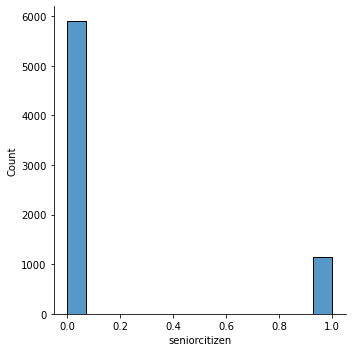

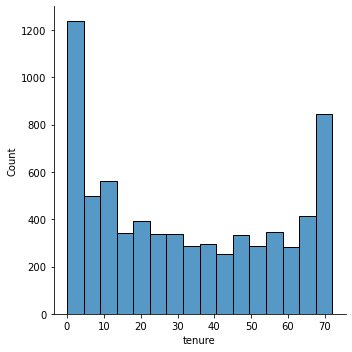

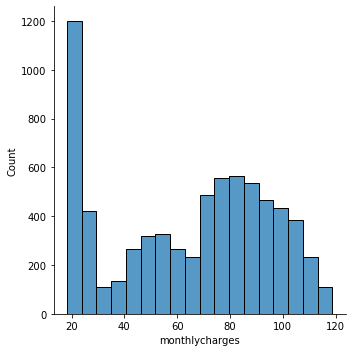

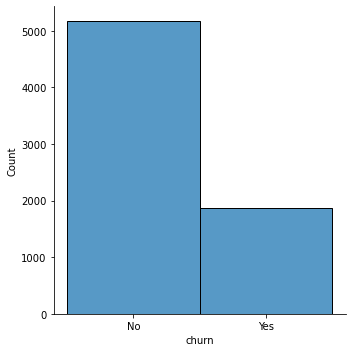

In [11]:
for col in df_data1:
    sns.displot(df_data1[col])
    plt.show()

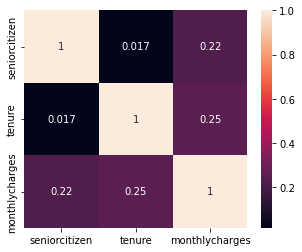

In [12]:
corr_matrix=df_data1.corr(method='pearson')  # Very low correlation values between independent variables.
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [13]:
Extract the target variable.

SyntaxError: invalid syntax (4120699059.py, line 1)

In [14]:
y=df_data1['churn'] # 'churn' is the variable that we want to predict.

In [15]:
y.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [ ]:
#Extract the independent variables and scale them

In [16]:
X= df_data1.drop(columns='churn')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
scaler = StandardScaler() 

X_scaled = scaler.fit_transform(X) # Now we are going to scale the independent variables.

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
#Build the logistic regression model.
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train) # This is the regression model without scaling the independent variables.

classification_scaled = LogisticRegression(random_state=42, max_iter=10000)# The regression model with scaled data.
classification_scaled.fit(X_train_scaled, y_train_scaled)

LogisticRegression(max_iter=10000, random_state=42)

In [20]:
#Evaluate the model.
predictions = classification.predict(X_test)
print(classification_report(y_test, predictions)) # This will give us the metrics without scaling the independent variables.

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1035
         Yes       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [21]:
predictions_scaled = classification_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, predictions)) # This will give us the metrics scaling the independent variables.

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1035
         Yes       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [ ]:
#Even a simple model will give us more than 70% accuracy. Why?
#Accuracy measures the proportion of well predicted true positives and true negatives over the total of predictions. In our database the "No" proportion (5.174 over a total of 7.043) is 0,7346 hence a 73,46%. This means, that if we make a prediction saying that all the targets variables will be a "No", we would have an accuracy of 73,46%. That is why, even with such a simple assumption or model, the accuracy would be very likely to be higher than 70%. This is a consequence of having imbalanced data.

In [ ]:
#8.Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement

In [22]:
smote = SMOTE()

# X = df_data1.drop('churn', axis=1)
# y = df_data1['churn']

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

In [23]:
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seniorcitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   monthlycharges  7043 non-null   float64
 3   churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, y_train = smote.fit_resample(X_train, y_train)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.87      0.71      0.79      1035
         Yes       0.48      0.72      0.57       374

    accuracy                           0.71      1409
   macro avg       0.67      0.72      0.68      1409
weighted avg       0.77      0.71      0.73      1409



In [ ]:
#Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [25]:
tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

No     4712
Yes    1869
Name: churn, dtype: int64

In [26]:
X_, y_ = tomek.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42, stratify=y_)


classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.89      0.85       943
         Yes       0.64      0.51      0.57       374

    accuracy                           0.78      1317
   macro avg       0.73      0.70      0.71      1317
weighted avg       0.77      0.78      0.77      1317



In [ ]:
#Compared to the SMOTE results we can see in the results table above, that the accuracy value has increased again. This can be because of the imbalanced data. On the other hand the metrics to predict "No" have improved, except the precision, which is a bit smaller. On the other hand, the metrics to predict "Yes" did the opposite except the f1-score, which stayed the same. Finally, if we compare the results with the imbalanced data on exercise 7 of this notebook, we can see that almost all the metrics (except precision to predict "Yes") improved or stayed the same, both for "Yes" and "No".